## 3. Feature Engineering
### 3-1. 다시 패키지와 데이터 불러오기 

In [53]:
# 패키지 import 
import pandas as pd
import numpy as np

# 그래프 관련 패키지 import 
import matplotlib.pyplot as plt  # mpatplotlib.pyplot
%matplotlib inline
from matplotlib.gridspec import GridSpec
import matplotlib.dates as mdates #  그래프의 원하는 날짜 형식으로 포멧 셋팅 Matplotlib.dates
import matplotlib.animation as animation # 그래프 애니메이션 효과 셋팅 Matplotlib.animation
import missingno as msno # 결측치 그래프 확인 missingno 패키지

import seaborn as sns
sns.set_style('darkgrid') # seaborn 그래프 background 회색으로 설정 
sns.set_context('talk') # 컨텍스트 매개 변수를 변경 플롯의 레이블에 대한 기본 글꼴 크기를 제어하는데 사용
sns.set(font_scale = 1)

import plotly.express as px # plotly.express
import plotly.io as pio # plotly 라이브러리를 표기하기 위해 추가한 코드 
pio.renderers.default = "notebook_connected"


# 모델링 관련 패키지 import 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import warnings   # 버전 충돌로 나오는 경고 표시를 표시하지 않게 설정 
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc   
# plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용) 한글 출력을 위한 글꼴 설정
plt.rcParams['font.family'] = 'AppleGothic'  # (MAC, 리눅스 용)
plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
# 사전 전처리 한 데이터 불러오기 
df_db_v2 = pd.read_csv('data/moduparkingDB.csv')
df_db_v2

,USER_ID,JOIN_DATE,JOIN_YEAR,JOIN_MONTH,JOIN_DAY,D_TYPE,STORE_ID,GOODS_TYPE,DATE,PAY_YEAR,PAY_MONTH,PAY_DAY,WEEKDAY,COUNT,AD1
0,2858,2014-01-07,2014,1,7,AA,1892,A,2020-01-01,2020,1,1,Wed,1,GN
1,5647,2014-02-14,2014,2,14,BB,182009,A,2020-01-01,2020,1,1,Wed,1,J
2,33314,2014-11-20,2014,11,20,BB,82431,A,2020-01-01,2020,1,1,Wed,1,SC
3,37001,2014-12-04,2014,12,4,BB,725,C,2020-01-01,2020,1,1,Wed,1,MP
4,37819,2014-12-07,2014,12,7,AA,220691,C,2020-01-01,2020,1,1,Wed,1,JRR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,2020,12,31,BB,219886,B,2020-12-31,2020,12,31,Thu,1,GN
879267,1830570,2020-12-31,2020,12,31,BB,82433,B,2020-12-31,2020,12,31,Thu,1,CY
879268,1830580,2020-12-31,2020,12,31,AA,92020,B,2020-12-31,2020,12,31,Thu,1,JRR
879269,1830589,2020-12-31,2020,12,31,BB,92437,B,2020-12-31,2020,12,31,Thu,1,J


### 3-2. Feature Engineering을 위한 전처리 

#### 1. 가입일 1970년도 데이터 제거 

In [3]:
df_db_v2[df_db_v2['JOIN_YEAR']==1970]

,USER_ID,JOIN_DATE,JOIN_YEAR,JOIN_MONTH,JOIN_DAY,D_TYPE,STORE_ID,GOODS_TYPE,DATE,PAY_YEAR,PAY_MONTH,PAY_DAY,WEEKDAY,COUNT,AD1
437,1081430,1970-01-01,1970,1,1,CC,90070,A,2020-01-01,2020,1,1,Wed,1,GD
2196,1410151,1970-01-01,1970,1,1,CC,92437,B,2020-01-02,2020,1,2,Thu,1,J
2204,1415023,1970-01-01,1970,1,1,CC,131081,A,2020-01-02,2020,1,2,Thu,1,YO
2434,125582,1970-01-01,1970,1,1,CC,91885,A,2020-01-03,2020,1,3,Fri,1,YD
2645,602188,1970-01-01,1970,1,1,CC,2334,B,2020-01-03,2020,1,3,Fri,1,MP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866536,1723400,1970-01-01,1970,1,1,CC,190188,A,2020-12-26,2020,12,26,Sat,1,JR
867913,1723400,1970-01-01,1970,1,1,CC,190188,A,2020-12-27,2020,12,27,Sun,1,JR
868210,1825656,1970-01-01,1970,1,1,CC,219936,A,2020-12-27,2020,12,27,Sun,1,YD
873707,1828010,1970-01-01,1970,1,1,CC,220635,C,2020-12-29,2020,12,29,Tue,1,GN


In [4]:
# 가입일 1970년도를 제거
df_db_v2 = df_db_v2[df_db_v2.JOIN_YEAR != 1970]

#### 2. User ID 999665 데이터 제거

In [5]:
df_db_v2[df_db_v2['USER_ID']==999665]

,USER_ID,JOIN_DATE,JOIN_YEAR,JOIN_MONTH,JOIN_DAY,D_TYPE,STORE_ID,GOODS_TYPE,DATE,PAY_YEAR,PAY_MONTH,PAY_DAY,WEEKDAY,COUNT,AD1
372,999665,2018-12-16,2018,12,16,CC,82399,A,2020-01-01,2020,1,1,Wed,6,JRR
1527,999665,2018-12-16,2018,12,16,CC,104988,A,2020-01-02,2020,1,2,Thu,11,GN
3121,999665,2018-12-16,2018,12,16,CC,181832,A,2020-01-03,2020,1,3,Fri,7,SC
5034,999665,2018-12-16,2018,12,16,CC,109223,A,2020-01-04,2020,1,4,Sat,28,MP
6919,999665,2018-12-16,2018,12,16,CC,104916,A,2020-01-05,2020,1,5,Sun,14,GN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867260,999665,2018-12-16,2018,12,16,CC,2428,A,2020-12-27,2020,12,27,Sun,17,CY
868847,999665,2018-12-16,2018,12,16,CC,109267,A,2020-12-28,2020,12,28,Mon,24,J
871562,999665,2018-12-16,2018,12,16,CC,90193,C,2020-12-29,2020,12,29,Tue,23,GW
874317,999665,2018-12-16,2018,12,16,CC,220797,D,2020-12-30,2020,12,30,Wed,40,GS


In [6]:
# 해당 아이디 제거
df_db_v2 = df_db_v2[df_db_v2['USER_ID'] != 999665]

In [7]:
df_db_v2

,USER_ID,JOIN_DATE,JOIN_YEAR,JOIN_MONTH,JOIN_DAY,D_TYPE,STORE_ID,GOODS_TYPE,DATE,PAY_YEAR,PAY_MONTH,PAY_DAY,WEEKDAY,COUNT,AD1
0,2858,2014-01-07,2014,1,7,AA,1892,A,2020-01-01,2020,1,1,Wed,1,GN
1,5647,2014-02-14,2014,2,14,BB,182009,A,2020-01-01,2020,1,1,Wed,1,J
2,33314,2014-11-20,2014,11,20,BB,82431,A,2020-01-01,2020,1,1,Wed,1,SC
3,37001,2014-12-04,2014,12,4,BB,725,C,2020-01-01,2020,1,1,Wed,1,MP
4,37819,2014-12-07,2014,12,7,AA,220691,C,2020-01-01,2020,1,1,Wed,1,JRR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,2020,12,31,BB,219886,B,2020-12-31,2020,12,31,Thu,1,GN
879267,1830570,2020-12-31,2020,12,31,BB,82433,B,2020-12-31,2020,12,31,Thu,1,CY
879268,1830580,2020-12-31,2020,12,31,AA,92020,B,2020-12-31,2020,12,31,Thu,1,JRR
879269,1830589,2020-12-31,2020,12,31,BB,92437,B,2020-12-31,2020,12,31,Thu,1,J


제외한 데이터 뺀 나머지 데이터는 총 87,812개

#### 3. Ontehot Encoding 
- 보고픈 데이터가 문자열 데이터이므로, 추후 의믜 있는 자료를 살펴보기 위해 문자열을 정수형태로 전환함
    - D_TYPE
    - GOOD_TYPE
    - WEEKDAY
    - AD1

In [8]:
# Feature Onehot Encoding
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

ndf = df_db_v2.copy()

ndf['D_TYPE'] = le.fit_transform(ndf['D_TYPE'])
ndf['GOODS_TYPE'] = le.fit_transform(ndf['GOODS_TYPE'])
ndf['WEEKDAY'] = le.fit_transform(ndf['WEEKDAY'])
ndf['AD1'] = le.fit_transform(ndf['AD1'])

print(ndf['D_TYPE'].unique())
print(ndf['GOODS_TYPE'].unique())
print(ndf['WEEKDAY'].unique())
print(ndf['AD1'].unique())

[0 1 2]
[0 2 1 3]
[6 4 0 2 3 1 5]
[39 49 63 52 51 80 37 81 43 30  4 22  0 14 53 19 79 64 31 44 23 60 29 42
 36 62 47 55 45 50 32 35 38 12 66  7  5 28 46 13 56 33 48 20 34 27 76 21
  3 16 40 69  1 24 74  6 83 26 57  8 82 61 58 25 68  9 77 10 70 15 67 65
 59 11 17 72 73 54 75 41 78 18  2 71]


In [9]:
# 비교를 위해 원 데이터 unique 값 출력 
print(df_db_v2['D_TYPE'].unique())
print(df_db_v2['GOODS_TYPE'].unique())
print(df_db_v2['WEEKDAY'].unique())
print(df_db_v2['AD1'].unique())

['AA' 'BB' 'CC']
['A' 'C' 'B' 'D']
['Wed' 'Thu' 'Fri' 'Sat' 'Sun' 'Mon' 'Tue']
['GN' 'J' 'SC' 'MP' 'JRR' 'YD' 'GJ' 'YO' 'GSN' 'GBC' 'BF' 'DJ' '0' 'CD'
 'NO' 'CY' 'YC' 'SD' 'GD' 'GSW' 'DM' 'R' 'GB' 'GS' 'GHN' 'SB' 'IND' 'P'
 'GW' 'JR' 'GEJ' 'GGY' 'GKP' 'CAS' 'SG' 'BJG' 'BHW' 'GAY' 'GYI' 'CCA'
 'PJP' 'GGC' 'IYS' 'DB' 'GGM' 'GAS' 'WOID' 'DIV' 'AOI' 'COI' 'GPJ' 'SOI'
 'ABP' 'DOI' 'WF' 'BI' 'ZP' 'EP' 'Q' 'BO' 'ZE' 'RRR' 'QGI' 'DSO' 'SOD'
 'BOI' 'WT' 'BP' 'SP' 'CN' 'SJV' 'SDU' 'QH' 'BUD' 'CU' 'VU' 'WAE' 'NW'
 'WH' 'GR' 'X' 'CVB' 'ADS' 'VO']


## 4. EDA2 - 관계있는 데이터 살펴 보기 

### 4-1. 상관관계 분석으로 분석해보기 

In [10]:
ndf.drop(['USER_ID','JOIN_DATE', 'JOIN_DAY', 'JOIN_MONTH', 'STORE_ID', 'DATE', 'PAY_DAY'],axis=1,inplace=True)

In [11]:
ndf

,JOIN_YEAR,D_TYPE,GOODS_TYPE,PAY_YEAR,PAY_MONTH,WEEKDAY,COUNT,AD1
0,2014,0,0,2020,1,6,1,39
1,2014,1,0,2020,1,6,1,49
2,2014,1,0,2020,1,6,1,63
3,2014,1,2,2020,1,6,1,52
4,2014,0,2,2020,1,6,1,51
...,...,...,...,...,...,...,...,...
879266,2020,1,1,2020,12,4,1,39
879267,2020,1,1,2020,12,4,1,19
879268,2020,0,1,2020,12,4,1,51
879269,2020,1,1,2020,12,4,1,49


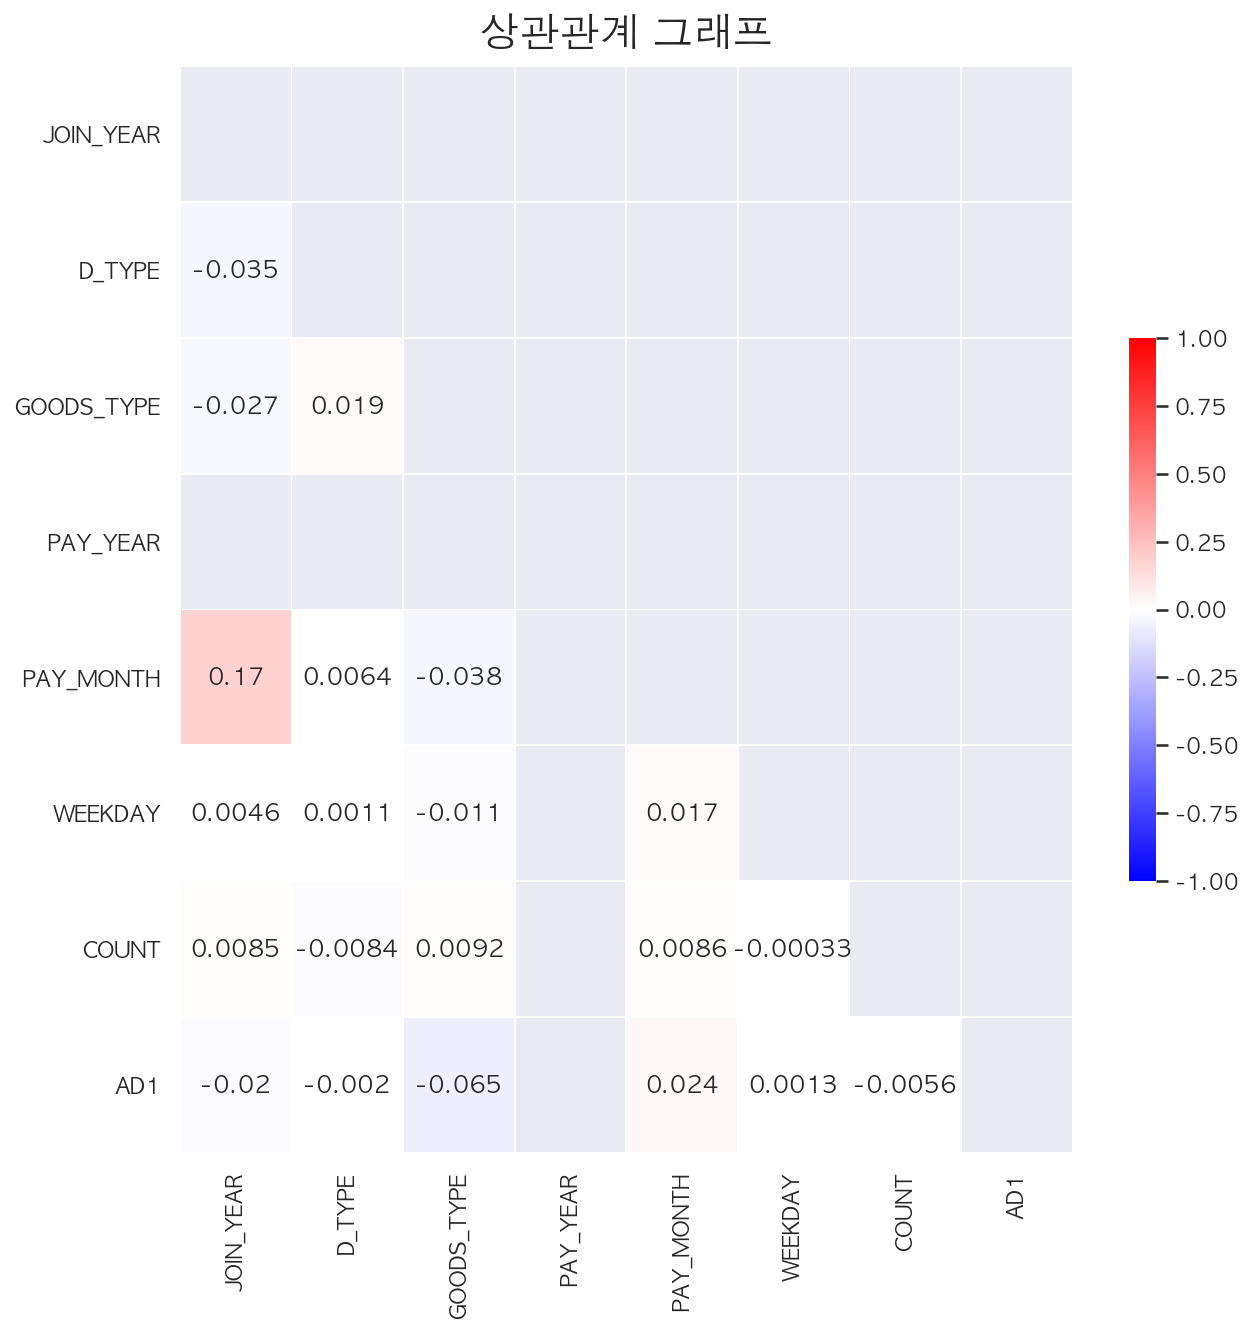

In [12]:
# 상관관계 그래프로 나타내기

a = ndf.corr()

# 사이즈 지정 
fig, ax = plt.subplots(figsize=(10, 10))

# 삼각형 마스크 만들기 (위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(a, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵 그리기 
sns.heatmap(a, 
            cmap = 'bwr', 
            annot = True,   # 실제 값 표시
            mask=mask,      # 표시하지 않을 마스크 부분 지정 
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5}, # 컬러바 크기 젋반으로 줄이기 
            vmin = -1,vmax = 1    # 컬러바 범위 -1 ~ 1
           )  
plt.title('상관관계 그래프', fontsize=20, pad=10)
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
 #          square=True, linewidths=.5, annot=True)
plt.show()

- 대체적으로 데이터 자체가 모든 상관관계가 없는 것으로 나온다.
- 데이터를 계속해서 살펴보니, D_TYPE과 결제관련 데이터, GOODS_TYPE과 결제관련 데이터가 연관있지 않을까?

### 4-2. 가설 설정 및 검증 

- 가설 검증 - 가설 검정을 위해 다음과 같이 정의
    1. 영가설(귀무가설) : D_TYPE과 GOODS_TYPE은 관계가 없을 것이다.
    2. 대립가설 :  D_TYPE과 GOODS_TYPE은 관계가 있을 것이다.
    - 유의 수준을 α를 0.05로 가정 (잘못된 의사결정을 내리 확률이 0.05라는 것을 의미)
    - **유의수준** : 가설검정에서 영가설(귀무가설)이 실제로 참일 때 영가설에 대한 판단의 오류수준(잘못을 기각할 확률)을 말함. **α**는 표본을 추출하기 이전에 설정하여 표본에서 얻은 결과가 우리의 선택에 영향을 미치지 않도록 한다. 보통 표본통계치가 나올 확률 p가 0.05 또는 0.01인 점을 유의수준으로 설정함.

In [13]:
# D_TYPE을 기준으로 GOODS_TYPE count하여 피벗테이블로 셋팅
observe = df_db_v2.pivot_table('USER_ID', ['D_TYPE'], 'GOODS_TYPE', aggfunc='count').reset_index()
observe.columns.name
observe = observe.set_index('D_TYPE')
observe

GOODS_TYPE,A,B,C,D
D_TYPE,,,,
AA,345779,65966,70010,11411
BB,262876,52435,60903,8327
CC,77,8,15,5


In [14]:
# 카이제곱, 자유도, P-value 계산
from scipy import stats  
chi2, p, dof, expected = stats.chi2_contingency(observe)
print("카이제곱 결과: ", chi2)
print("자유도 결과: ", dof)
print("P-Value 결과: ", p)

카이제곱 결과:  524.1010110891614
자유도 결과:  6
P-Value 결과:  5.39468417109281e-110


- P-value 계산결과 유의 수준인 0.05보다 작은 0이 나옴, 그리하여 D_TYPE과 GOODS_TYPE은 관계가 없을 것이다. 라는 영가설을 기각한다.
- 즉 D_TYPE과 GOODS_TYPE은 관계가 있다.
- D_TYPE과 GOODS_TYPE을 기준으로 데이터를 살펴보도록 한다.

### 4-3. D_TYPE과 가입일자 비교해보기 

In [15]:
# D_TYPE의 패턴 : 주기성 확인
df_db_v2.groupby(['JOIN_DATE', 'D_TYPE']).size().unstack(fill_value=0)

D_TYPE,AA,BB,CC
JOIN_DATE,,,
2013-12-16,2,0,0
2013-12-17,3,23,0
2013-12-18,1,0,0
2013-12-21,2,0,0
2013-12-22,0,2,0
...,...,...,...
2020-12-27,54,48,0
2020-12-28,83,52,0
2020-12-29,66,49,0


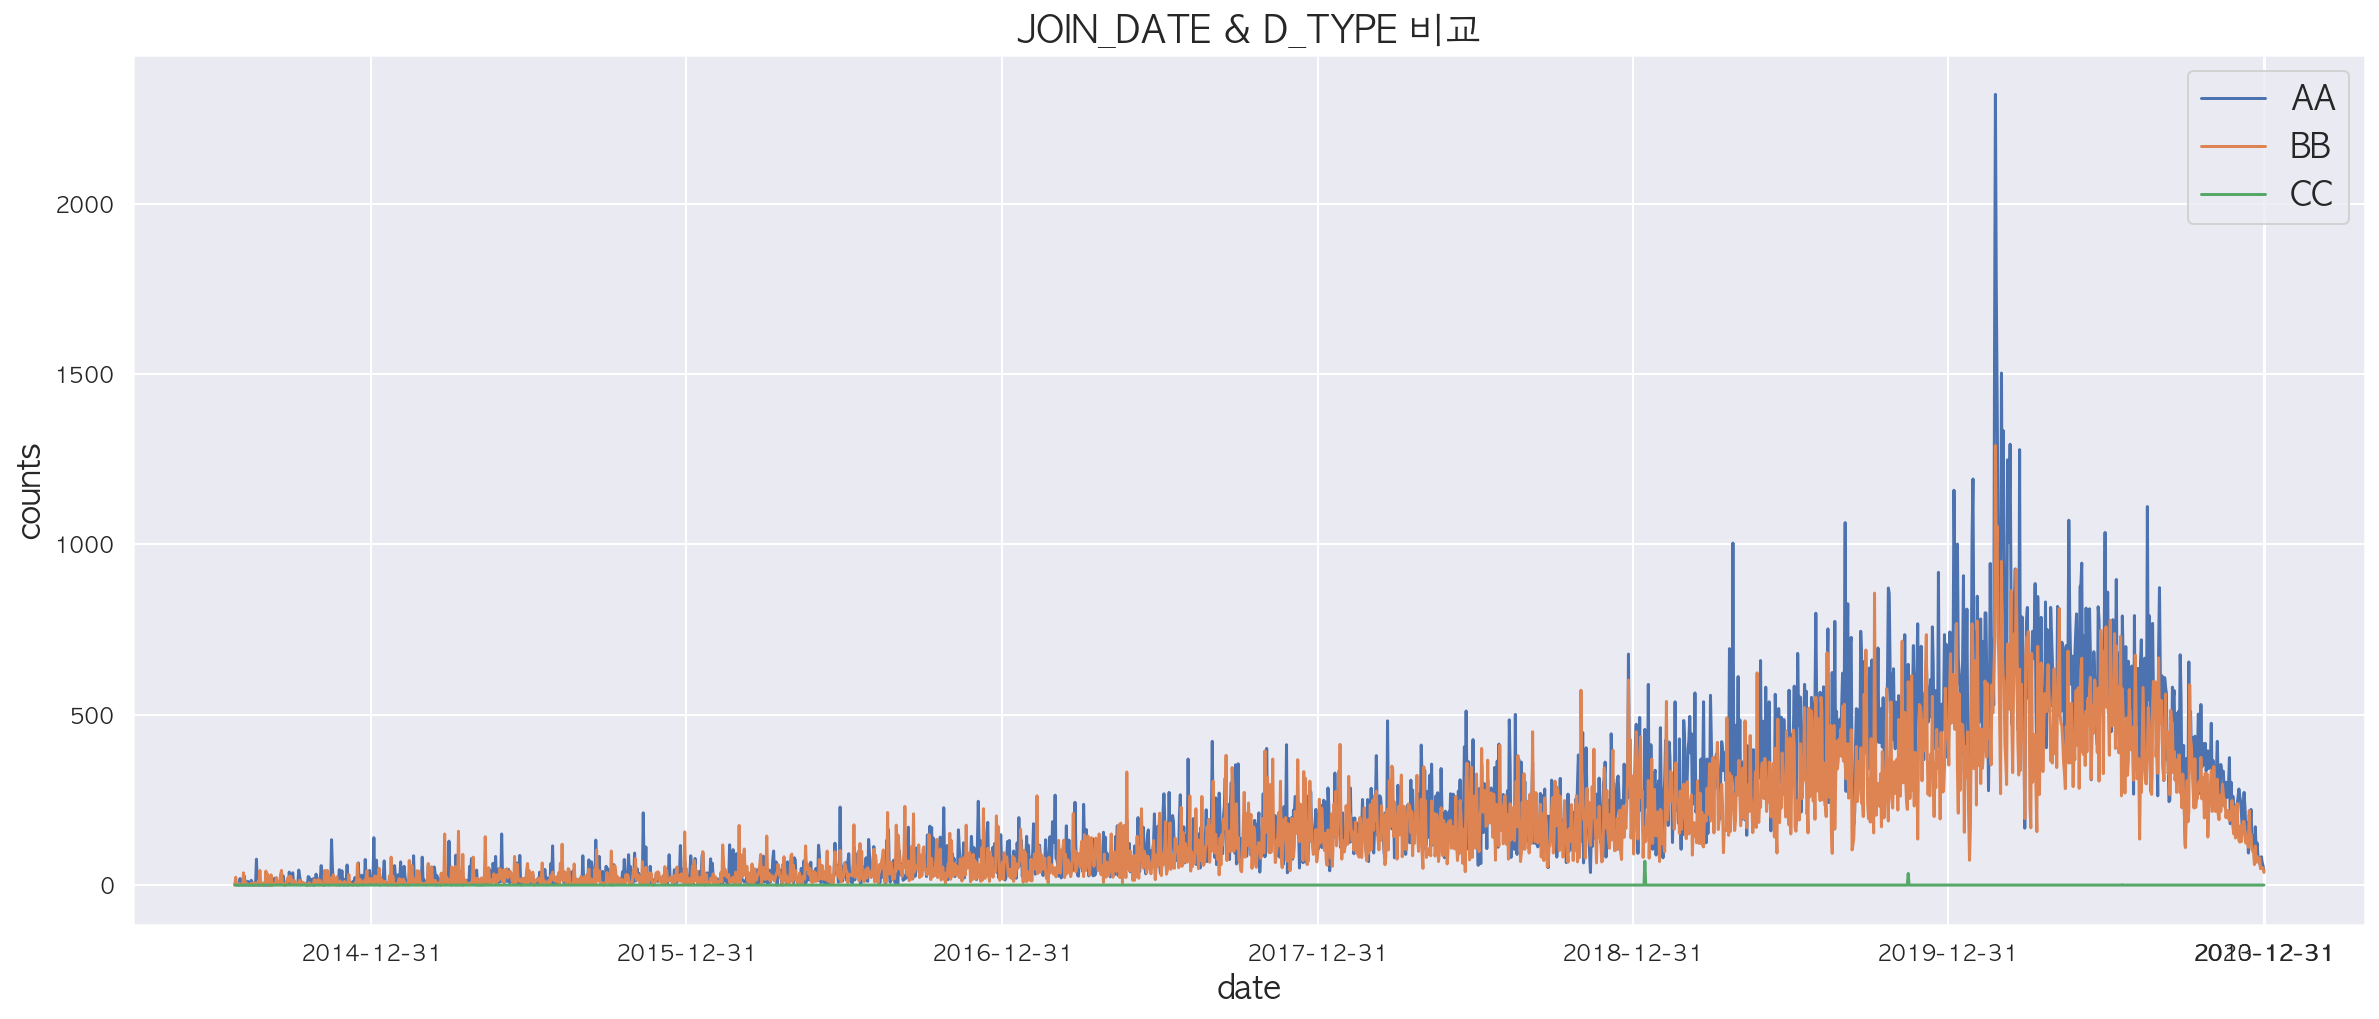

In [16]:
# goods_type 별 결제량 시각화
joinbydate = df_db_v2.groupby(['JOIN_DATE', 'D_TYPE']).size().unstack(fill_value=0)

plt.figure(figsize=(20,8))
sns.lineplot(joinbydate.index, joinbydate['AA'])
sns.lineplot(joinbydate.index, joinbydate['BB'])
sns.lineplot(joinbydate.index, joinbydate['CC'])

plt.legend(['AA', 'BB', 'CC'], loc='best', fontsize=16)
plt.title('JOIN_DATE & D_TYPE 비교', fontsize=18)
plt.ylabel('counts', fontsize=16)
plt.xlabel('date', fontsize=16)
plt.xticks(ticks = ['2013-12-31', '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31'])
plt.show()

- 가입일자별 D_TYPE을 살펴본결과 전체적으로 2020년 년초에 갑자기 튀는 구간이 있다가 다시 줄어드는 모습을 볼 수있다.
- 사실상 여기서는 큰 인사이트는 얻을 수 없다. 그러나 자료를 찾는 도중 D_TYPE이 주차장 종류가 아닐까 하는 생각을 하게 됨.
- 어플을 다시 살펴보니 모두의 주차장에서는 크게 민영주차장, 공유주차장, 공영주차장 이렇게 나누어짐.
- 그래서 결제일과 D_TYPE을 비교해보기로 함.

### 4-4.  D_TYPE과 결제의 관계

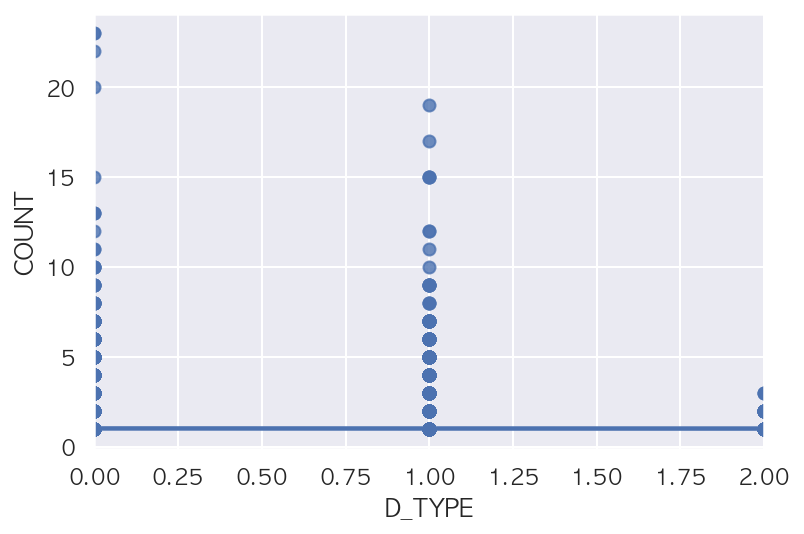

In [17]:
sns.regplot(data=ndf, x='D_TYPE', y='COUNT');

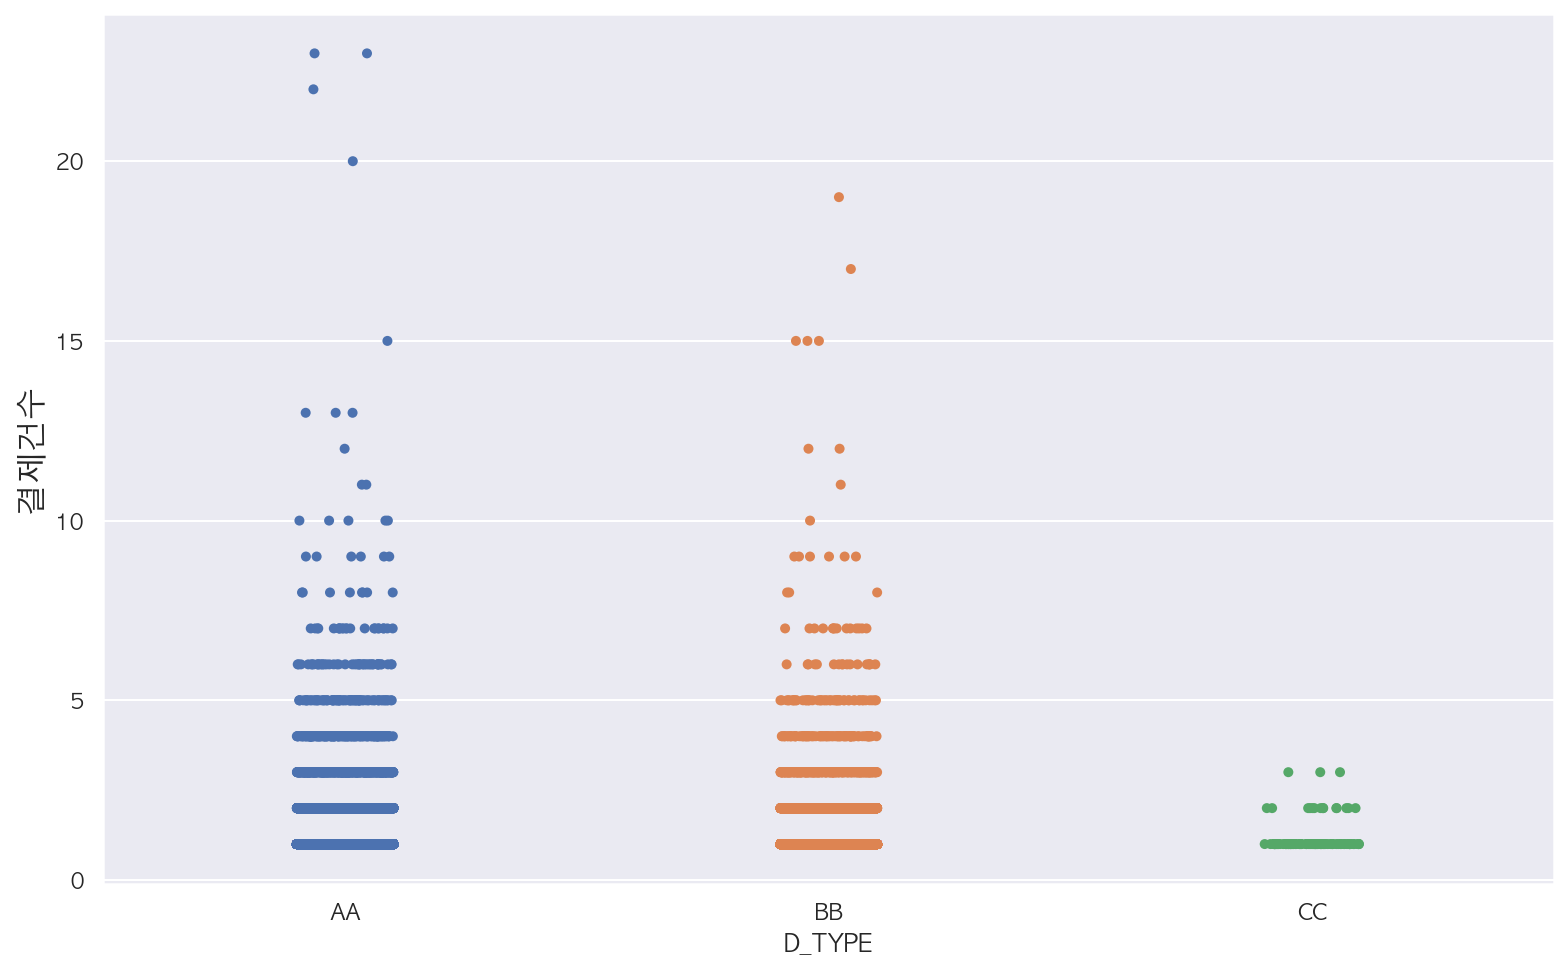

In [18]:
plt.figure(figsize=(13,8))
sns.stripplot(y = df_db_v2.COUNT, x = df_db_v2['D_TYPE'])
plt.ylabel('결제건수', fontsize=16);

- 우선 스트립플랏으로 보았을 때 산포도가 잘 밀집해있다. 
- 결제건수와 D_TYPE은 연관관계를 가지고 있다고 볼 수 있다.

In [19]:
# D_TYPE의 패턴 : 주기성 확인
df_db_v2.groupby(['DATE', 'D_TYPE']).size().unstack(fill_value=0)

D_TYPE,AA,BB,CC
DATE,,,
2020-01-01,554,368,0
2020-01-02,827,648,0
2020-01-03,970,749,0
2020-01-04,1307,875,1
2020-01-05,884,612,0
...,...,...,...
2020-12-27,661,590,0
2020-12-28,1587,1134,0
2020-12-29,1601,1146,1


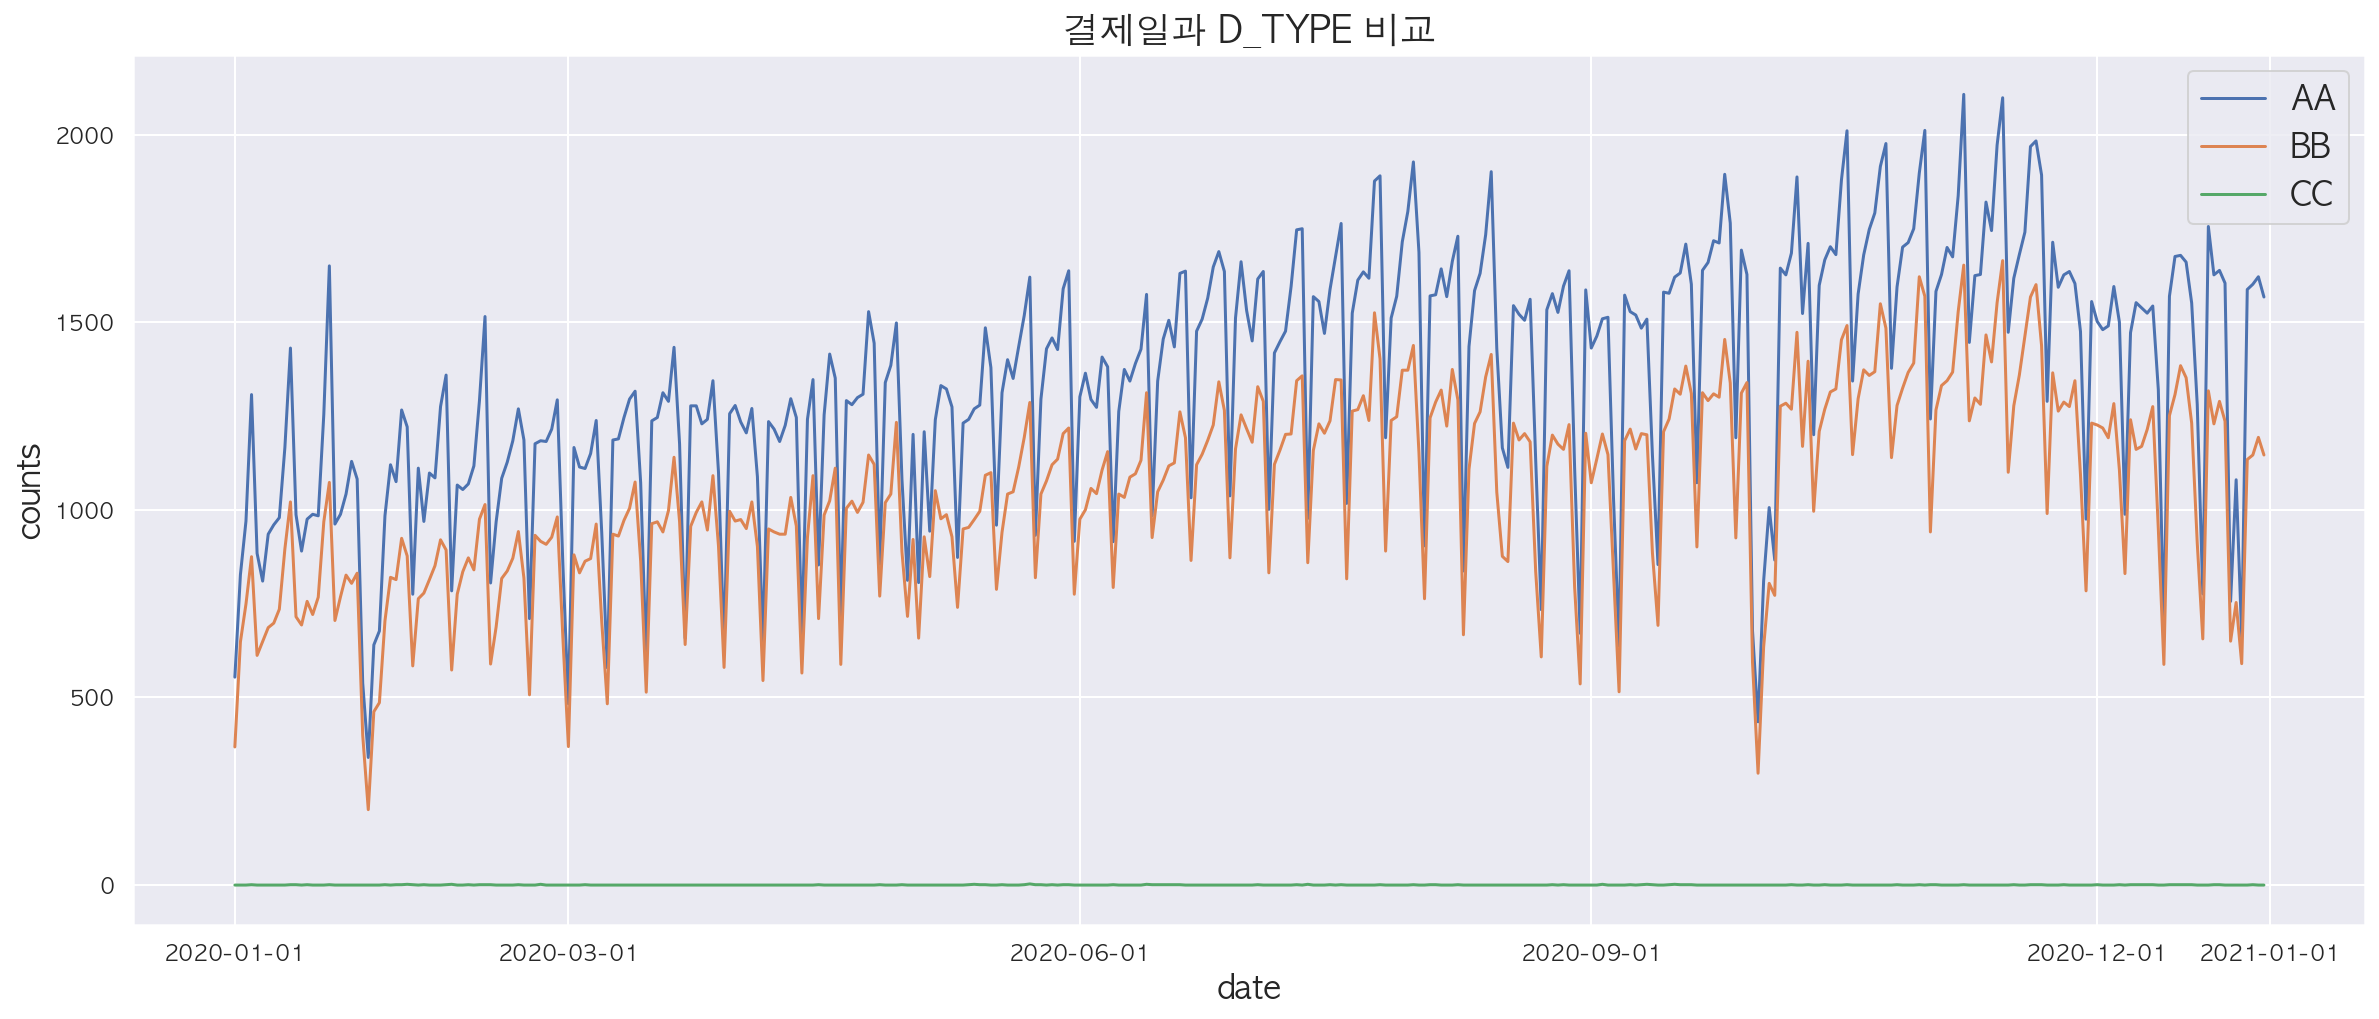

In [21]:
# D_TYPE 별 결제일 시각화
paybydtype = df_db_v2.groupby(['DATE', 'D_TYPE']).size().unstack(fill_value=0)

plt.figure(figsize=(20,8))
sns.lineplot(paybydtype.index, paybydtype['AA'])
sns.lineplot(paybydtype.index, paybydtype['BB'])
sns.lineplot(paybydtype.index, paybydtype['CC'])

plt.legend(['AA', 'BB', 'CC'], loc='best', fontsize=16)
plt.title('결제일과 D_TYPE 비교', fontsize=18)
plt.ylabel('counts', fontsize=16)
plt.xlabel('date', fontsize=16)
plt.xticks(ticks = ['2020-01-01', '2020-03-01', '2020-06-01', '2020-09-01', '2020-12-01', '2021-01-01'])
plt.show()

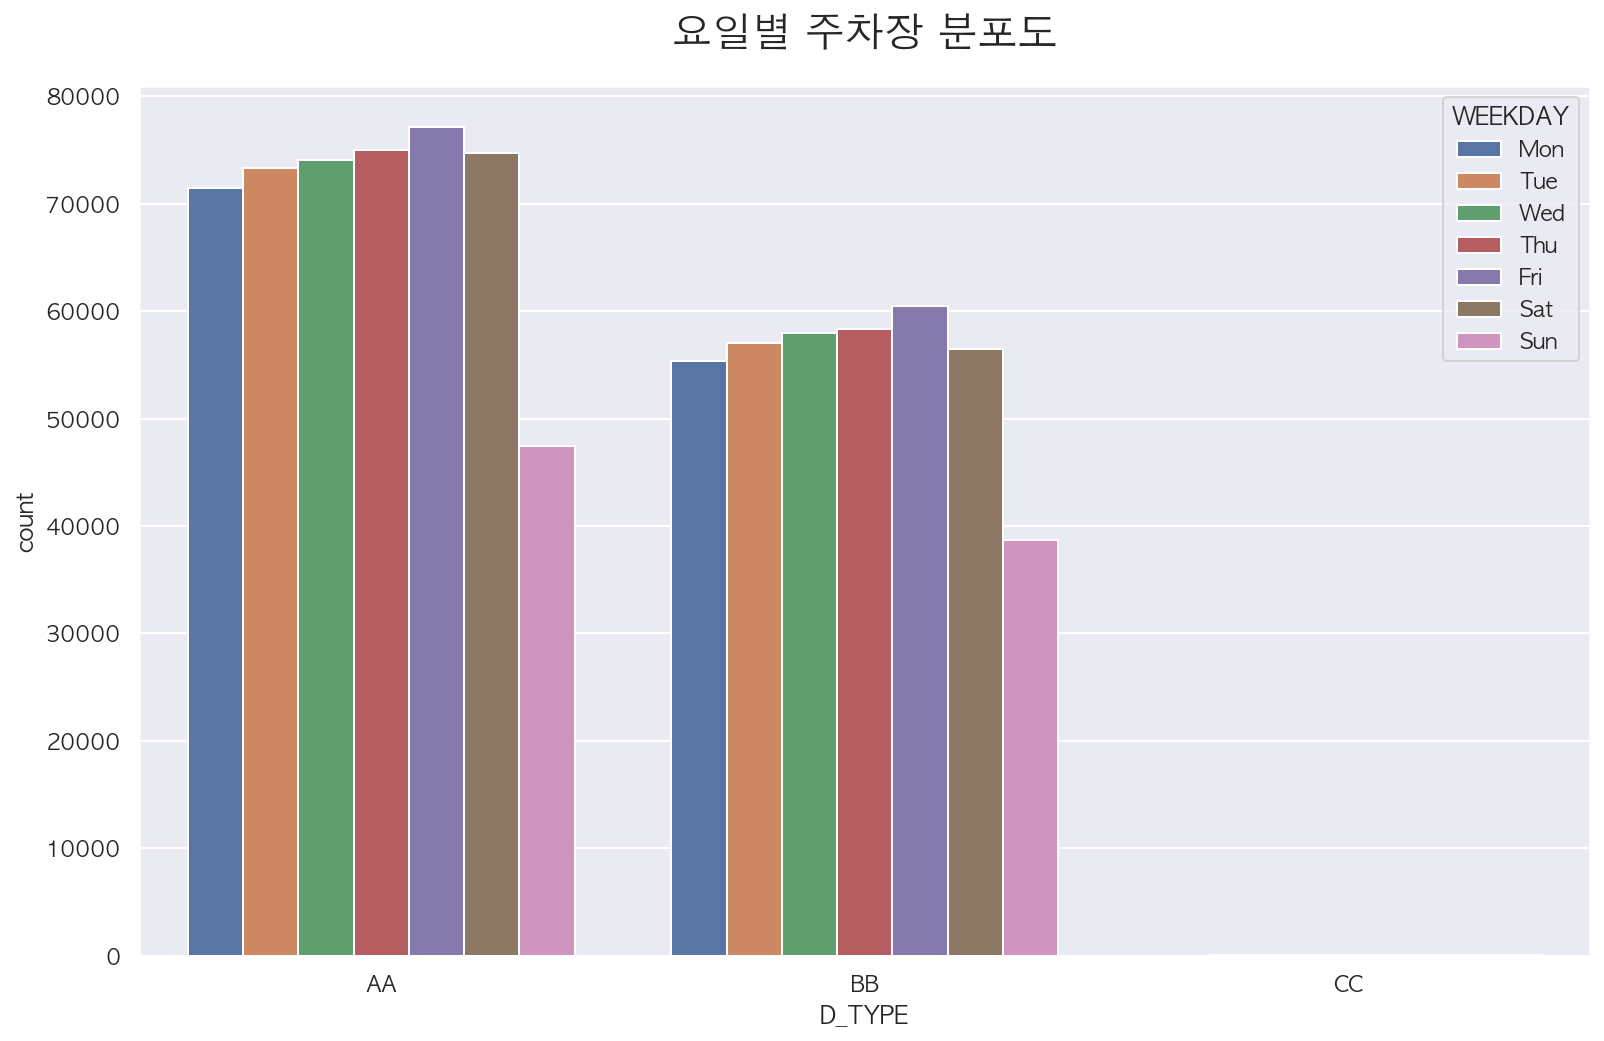

In [22]:
plt.figure(figsize=(13,8))
plt.title("요일별 주차장 분포도", fontsize=20, pad=20)
sns.countplot(data=df_db_v2, x="D_TYPE", order=["AA", "BB", "CC"],
              hue="WEEKDAY", hue_order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]);

In [23]:
# D_TYPE과 결제건수를 그룹화 
df_db_v2.groupby(['D_TYPE', 'COUNT']).size().unstack(fill_value=0)

COUNT,1,2,3,4,5,6,7,8,9,10,11,12,13,15,17,19,20,22,23
D_TYPE,,,,,,,,,,,,,,,,,,,
AA,484275,7801,726,183,83,46,22,8,6,5,2,1,3,1,0,0,1,1,2
BB,378341,5685,329,87,50,17,14,3,6,1,1,2,0,3,1,1,0,0,0
CC,88,14,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- 결제일자와 결제건수를 비교해보니 여전히 AA가 가장 높게나왔고, CC는 가장 낮게 나왔다. 
- 해당 그래프로 모든 것이 설명되기 힘들겠지만, D_TYPE은 주차장의 정보로 보인다 
- AA가 결제율이 높은 민영 주차장, BB가 공유 주차장, CC가 공영 주차장으로 파악된다.
- 참고로 모두의 주차장은 나의 주차 장소를 공유해서 다른사람이 주차를 할 수 있게 되어있다. (만약 주차장을 공유해주면 소정의 공유를 해준 당사자가 주차비를 벌 수있다.)
- 1번 결제한 횟수도 가장 많은 것이 AA 타입임을 알 수 있다.
- 요일별로 주차장 분포를 살펴보니 대체적으로 금요일과 토요일의 이용이 많다.

### 4-5. Goods_Type과 결제관계

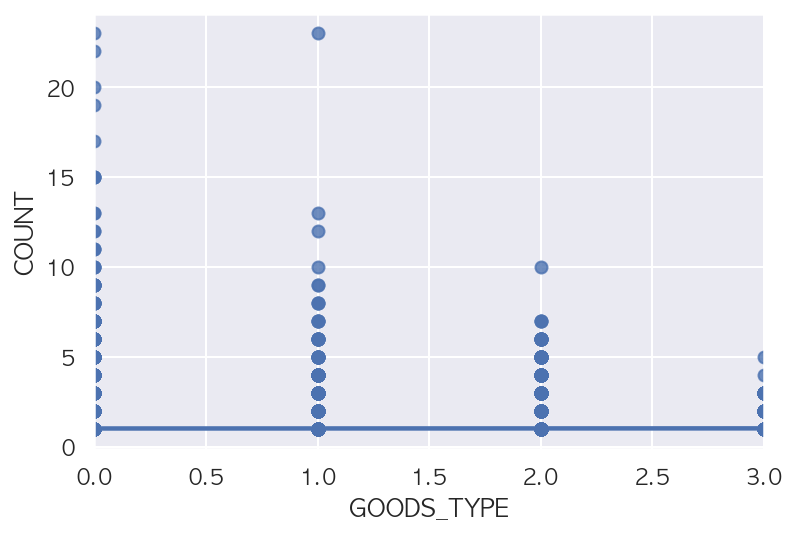

In [24]:
sns.regplot(data=ndf, x='GOODS_TYPE', y='COUNT');

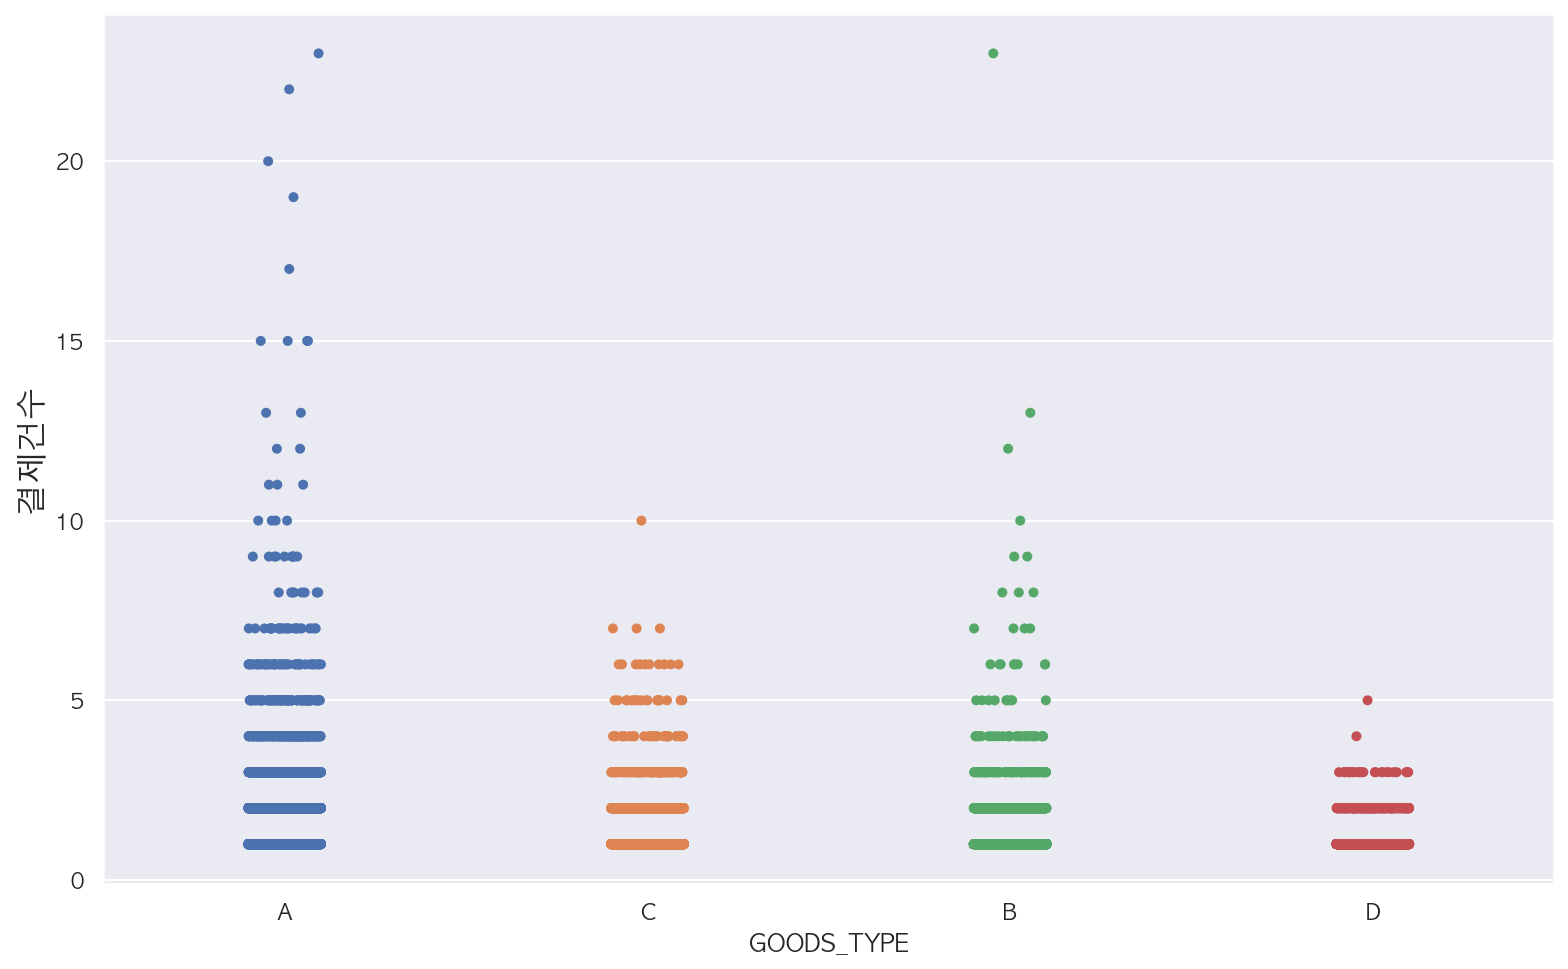

In [25]:
plt.figure(figsize=(13,8))
sns.stripplot(y = df_db_v2.COUNT, x = df_db_v2['GOODS_TYPE'])
plt.ylabel('결제건수', fontsize=16);

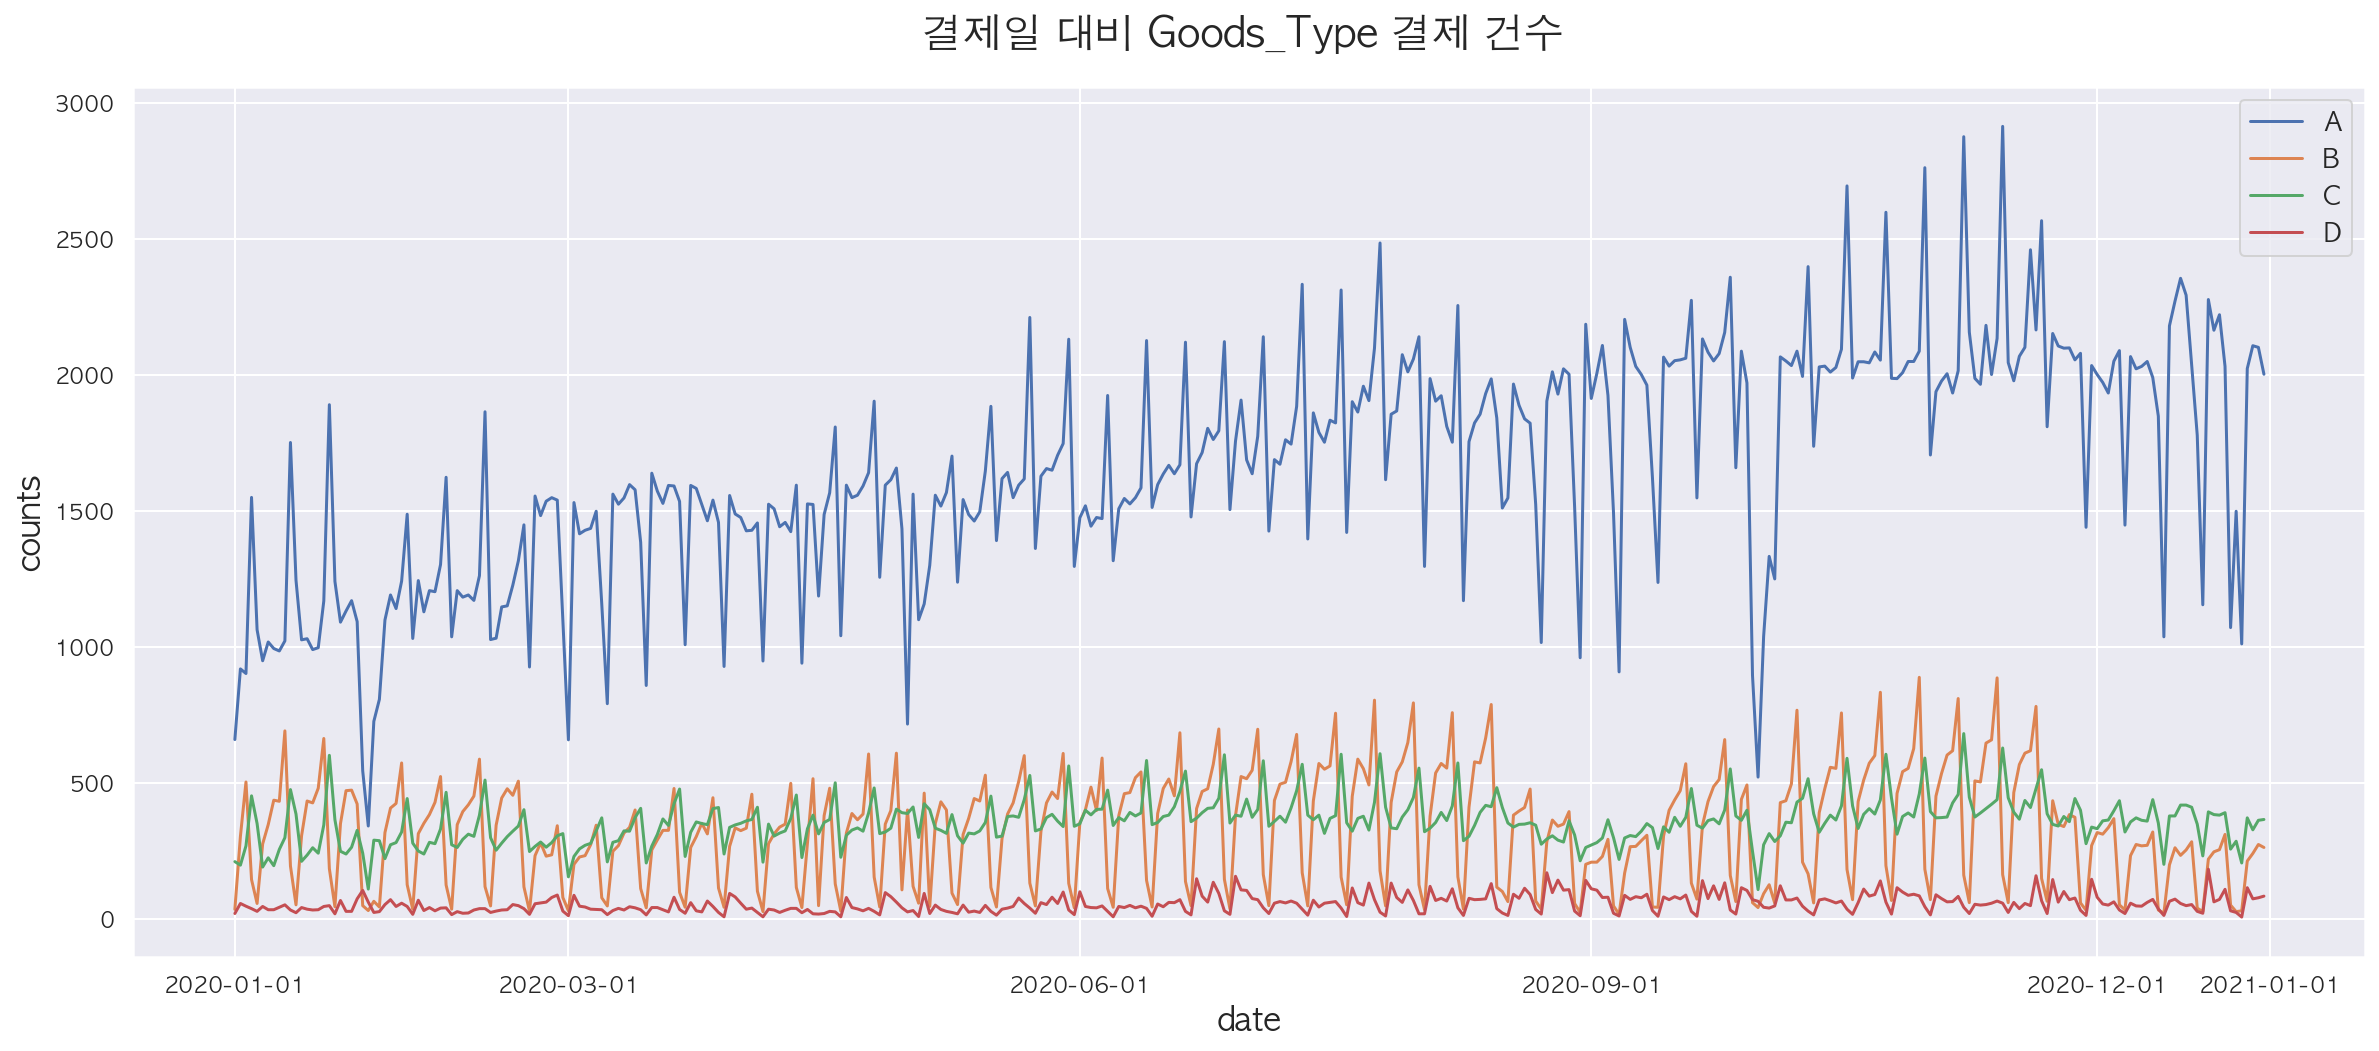

In [31]:
countbydate = df_db_v2.groupby(['DATE', 'GOODS_TYPE']).size().unstack(fill_value=0)

plt.figure(figsize=(20,8))
sns.lineplot(countbydate.index, countbydate['A'])
sns.lineplot(countbydate.index, countbydate['B'])
sns.lineplot(countbydate.index, countbydate['C'])
sns.lineplot(countbydate.index, countbydate['D'])

plt.legend(['A', 'B', 'C', 'D'], loc='best', fontsize=13)
plt.title('결제일 대비 Goods_Type 결제 건수 ', fontsize=20, pad=20)
plt.ylabel('counts', fontsize=16)
plt.xlabel('date', fontsize=16)
plt.xticks(ticks = ['2020-01-01', '2020-03-01', '2020-06-01', '2020-09-01', '2020-12-01', '2021-01-01'])
plt.show()

- 위의 D_TYPE 즉 주차장 종류와 비슷한 추이를 보인다. 
- 해당 GOODS_TYPE은 모두의 주차장 서비스 이용시 결제를 위한 주차권으로 예상된다.
- 하지만 이용하는 주차장마다 결제하는 주차권이 다 다르다. 그래서 해당 정보는 그냥 주차권 A, B, C, D로 구분하려 함.

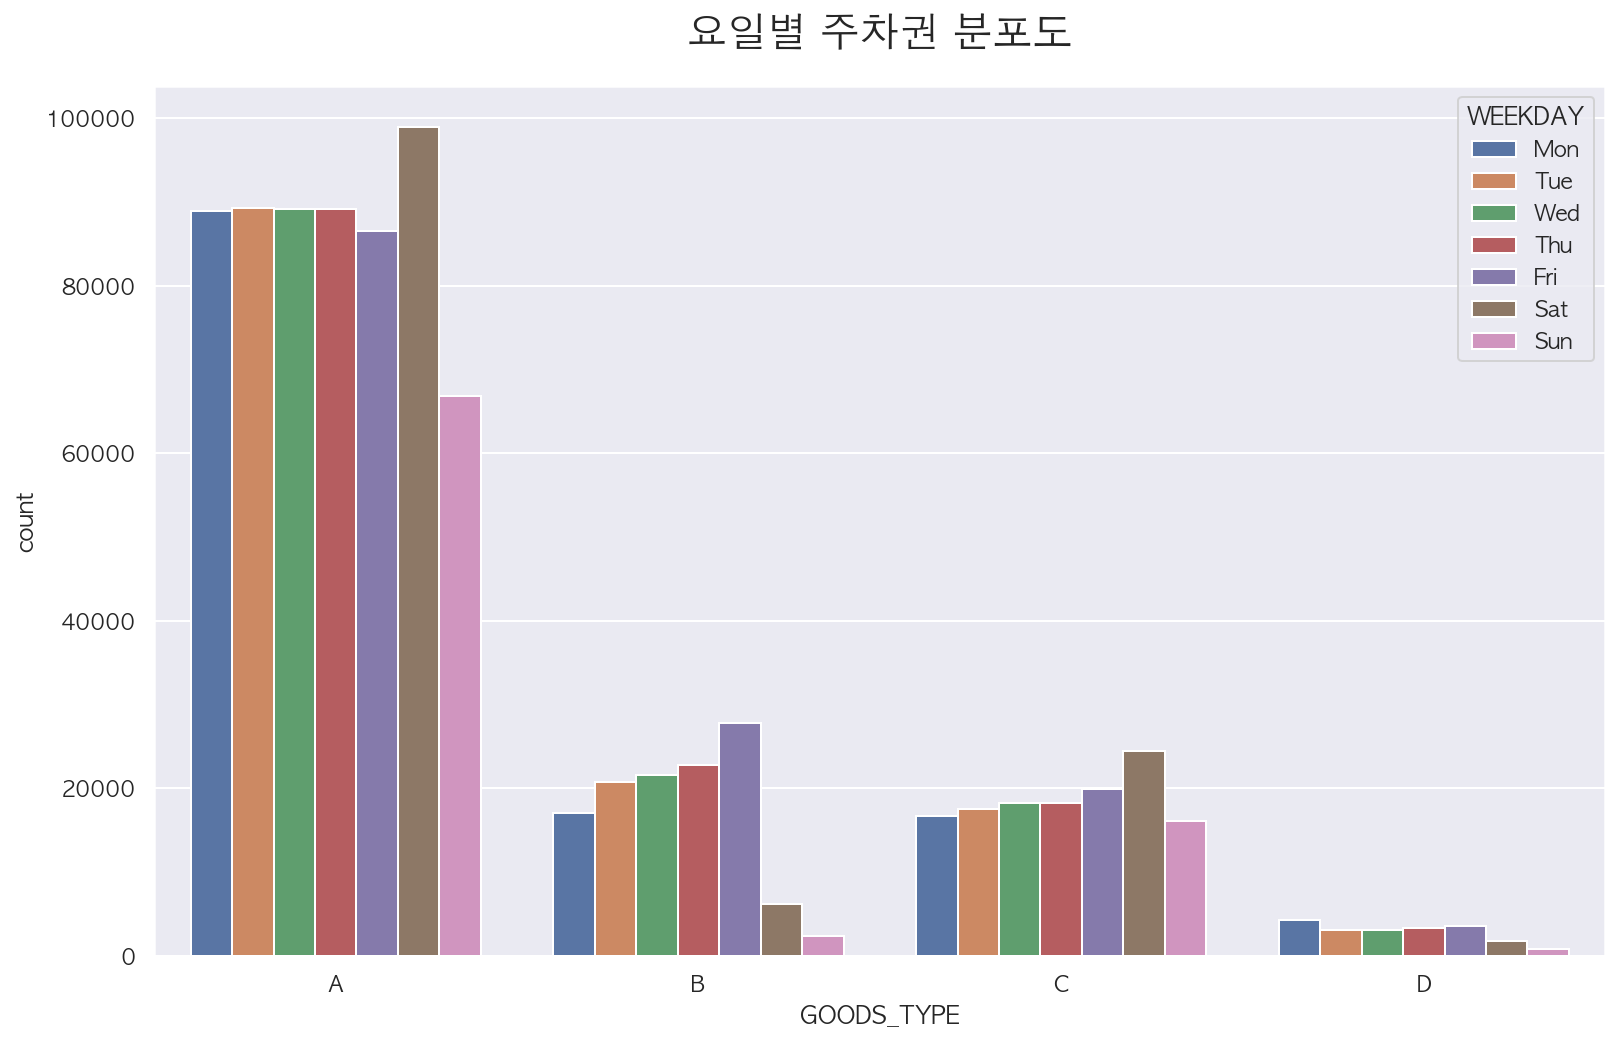

In [27]:
plt.figure(figsize=(13,8))
plt.title("요일별 주차권 분포도", fontsize=20, pad=20)
sns.countplot(data=df_db_v2, x="GOODS_TYPE", order=["A", "B", "C", "D", ],
              hue="WEEKDAY", hue_order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]);

- 결제가 가장 많이 이뤄지는 것은 A 주차권이며, 이용이 가장 많은 요일은 토요일이다. 
- 전체를 살펴보니 각 주차권을 결제한 요일이 다르다. 
- 해당 자료는 어떤 요일에 결제를 많이 하는지 인사이트를 얻고자 할 때 사용되면 좋을 듯하다.

### 4-6. 주소

In [28]:
# D_TYPE과 결제건수를 그룹화 
df_db_v2.groupby(['AD1', 'D_TYPE']).size().unstack(fill_value=0)

D_TYPE,AA,BB,CC
AD1,,,
0,2239,1968,0
ABP,82,21,0
ADS,0,1,0
AOI,48,26,0
BF,10706,7167,33
...,...,...,...
YC,986,627,0
YD,28021,19621,2
YO,19981,17135,1


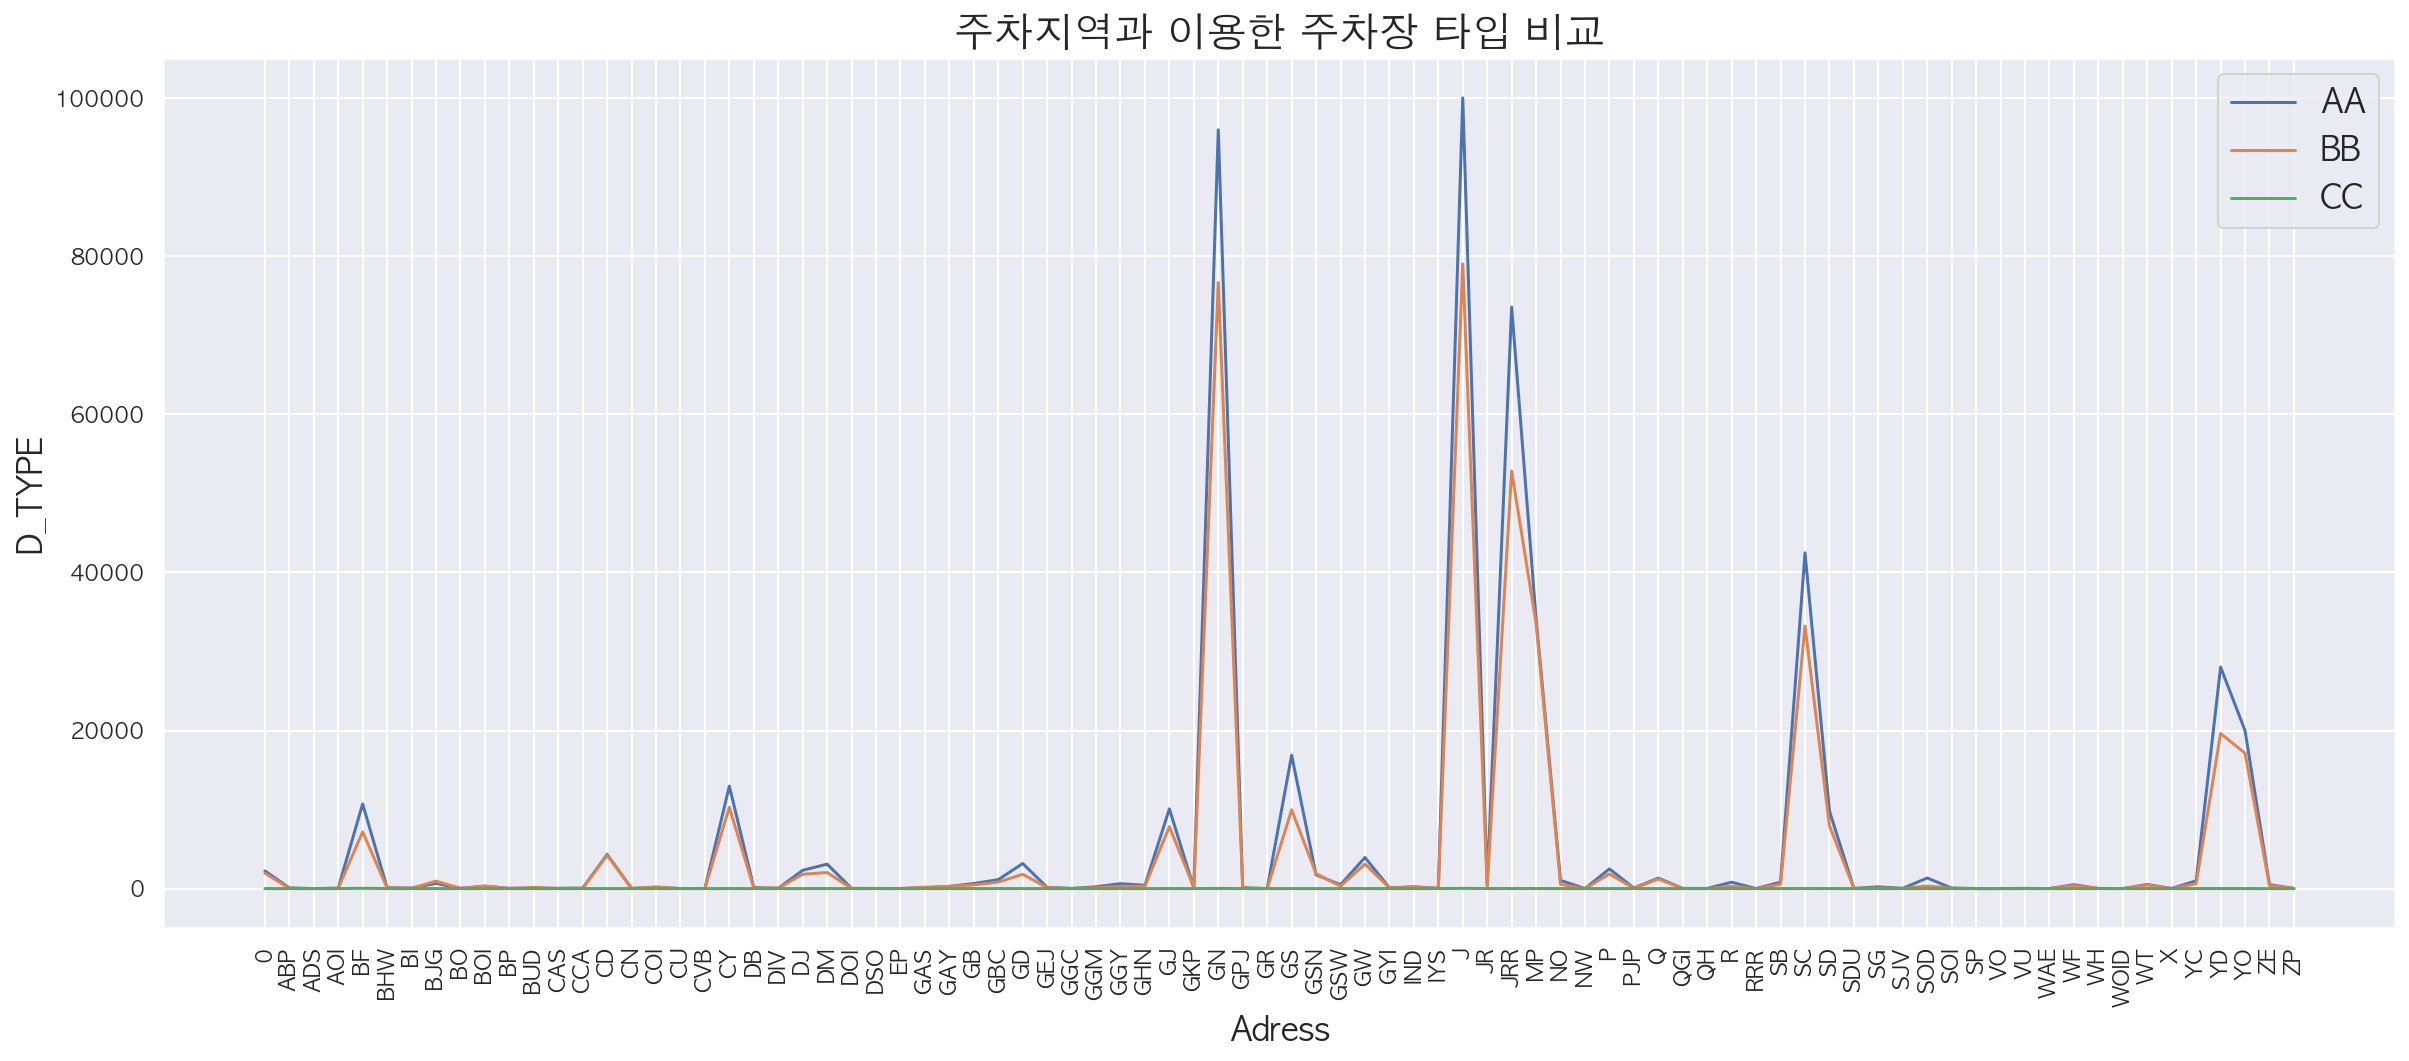

In [38]:
ad = df_db_v2.groupby(['AD1', 'D_TYPE']).size().unstack(fill_value=0)

plt.figure(figsize=(20,8))
sns.lineplot(ad.index, ad['AA'])
sns.lineplot(ad.index, ad['BB'])
sns.lineplot(ad.index, ad['CC'])

plt.legend(['AA', 'BB', 'CC'], loc='best', fontsize=16)
plt.title('주차지역과 이용한 주차장 타입 비교', fontsize=20)
plt.ylabel('D_TYPE', fontsize=16)
plt.xlabel('Adress', fontsize=16)
plt.xticks(rotation = 90)
plt.show()

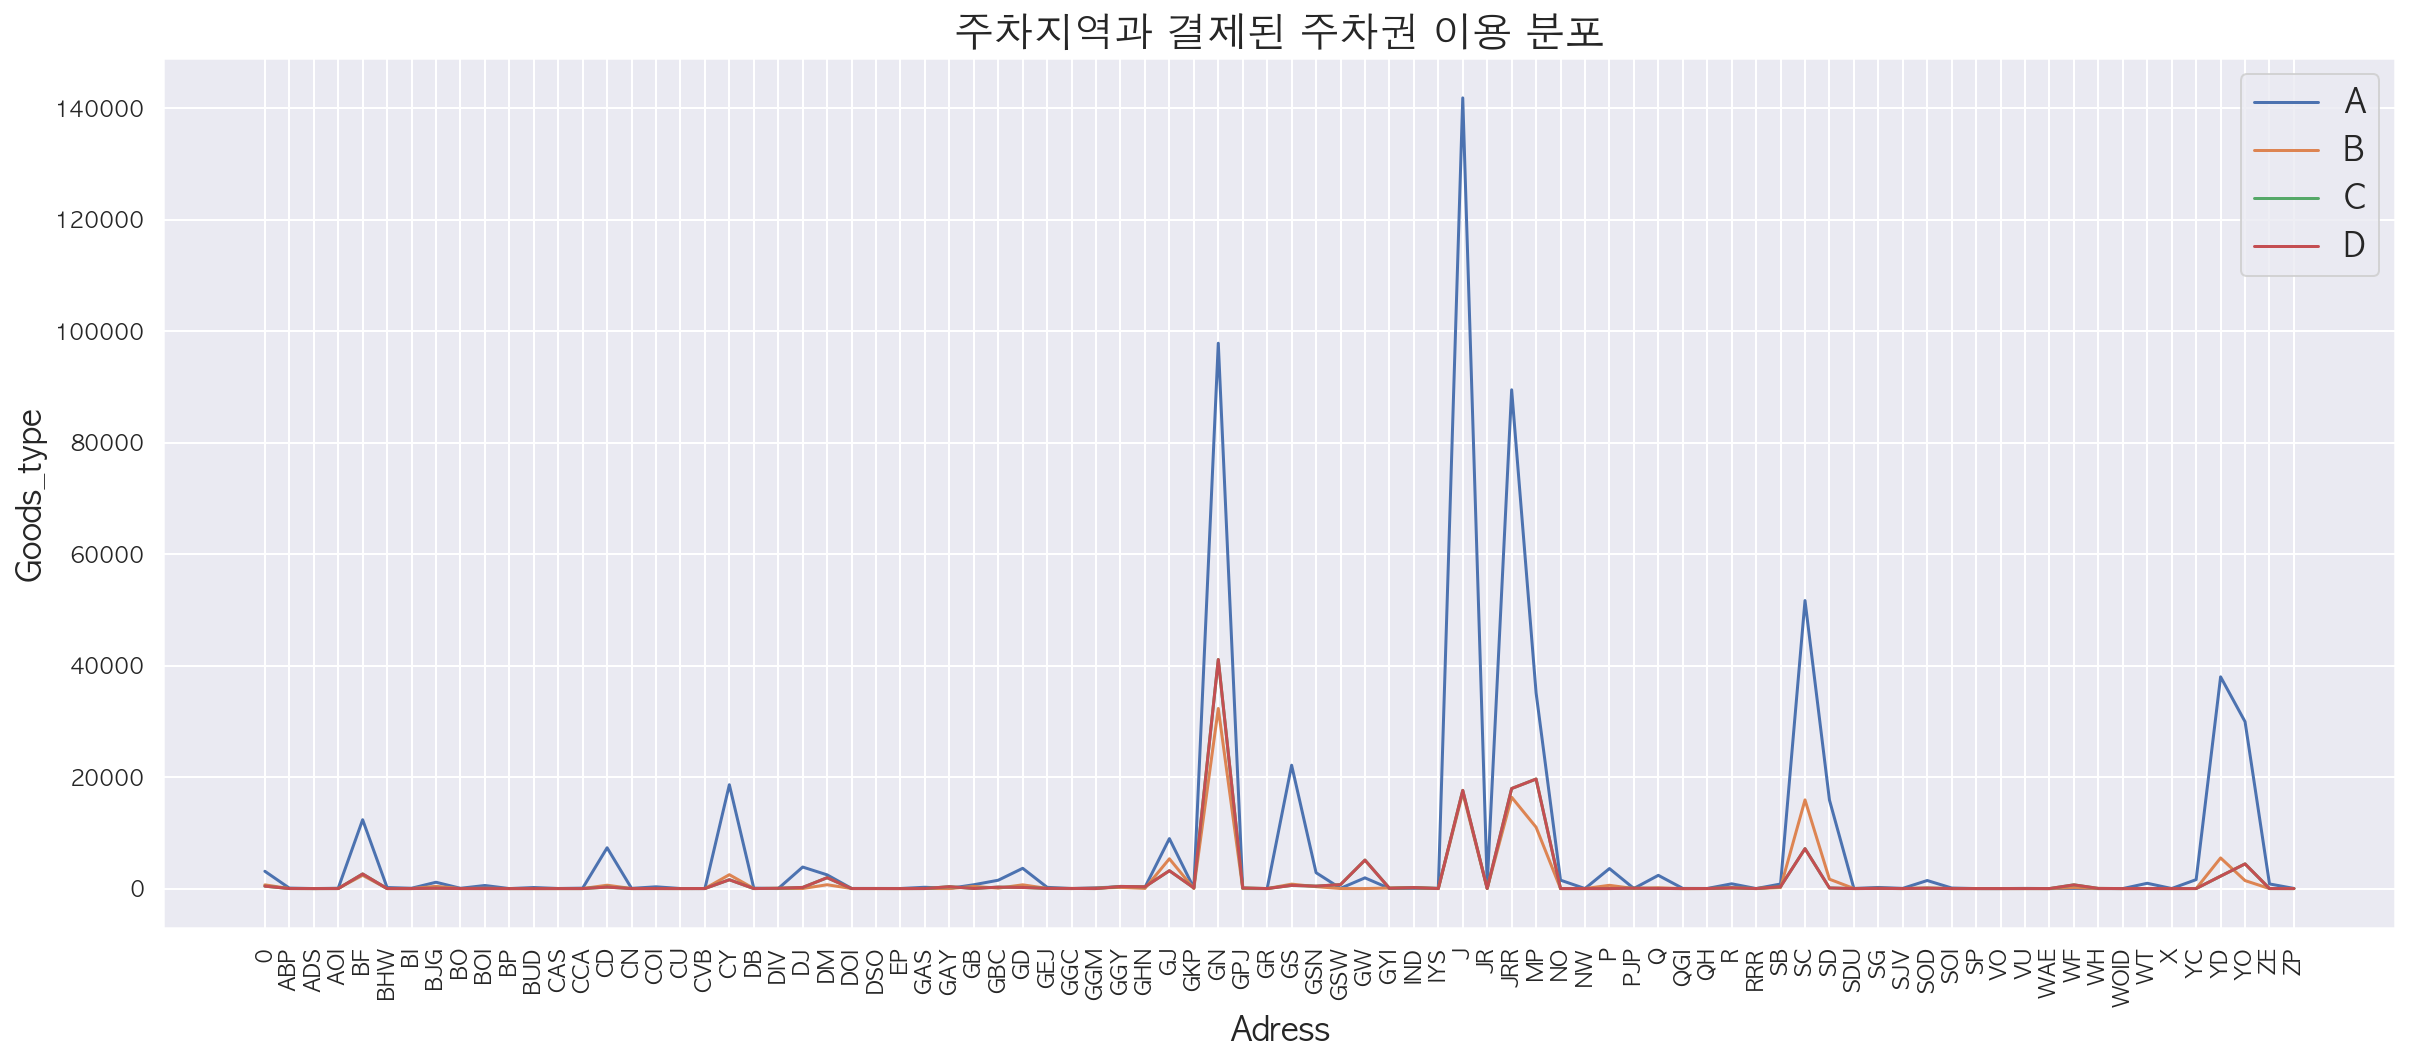

In [40]:
ad1 = df_db_v2.groupby(['AD1', 'GOODS_TYPE']).size().unstack(fill_value=0)

plt.figure(figsize=(20,8))
sns.lineplot(ad1.index, ad1['A'])
sns.lineplot(ad1.index, ad1['B'])
sns.lineplot(ad1.index, ad1['C'])
sns.lineplot(ad1.index, ad1['C'])

plt.legend(['A', 'B', 'C', 'D'], loc='best', fontsize=16)
plt.title('주차지역과 결제된 주차권 이용 분포', fontsize=20)
plt.ylabel('Goods_type', fontsize=16)
plt.xlabel('Adress', fontsize=16)
plt.xticks(rotation = 90)
plt.show()

- 주차장및 주차권 결제가 많이 이뤄진 지역은 중구, 강남, 종로이다. 
- 참고로 해당 지역은 회사 밀집지역이고, 사람이 가장 많은 곳이라, 늘 주차난에 시달리는 지역이다.

### 정리 
- 해당 데이트가 상관관계 그래프로 파악이 어려워, 부족하지만 아는선에서 추측통계(P-vlaue 수치)를 이용하여 D_TYPE과 GOODS_TYPE이 관계가 있음을 파악함.
- 계속해서 데이터에 관한 자료를 찾아보니 관계가 있는 컬럼들의 정보가 D_TYPE은 주차장 종류 (민영, 공유, 공영) / GOODS_TYPE은 주차권임을 알아냄.
- 결제일 기준으로 이용 주차장과 결제 주차권을 살펴보니 비슷한 추이를 나타냄. 
- 주소 즉 주차구역을 기준으로 살펴보니 이용과 결제가 많이 이뤄진 곳은 중구 -> 강남 -> 종로 순으로 많았다. (해당 3지역은 주차난에 늘 시달리는 곳이다.)

#### 해당 EDA를 기점으로 모델링에 사용할 Feature를 설정 
1. D_TYPE(이용 주차장 타입)
2. GOODS_TYPE(결제 주차권 타입)
3. COUNT(결제 건수)
4. WEEKDAY(요일)
5. AD1(행정구 주소)

## 5. 모델링 구축 

In [42]:
# 앞에서 Onehot Encoding된 데이터 불러오기 
ndf

,JOIN_YEAR,D_TYPE,GOODS_TYPE,PAY_YEAR,PAY_MONTH,WEEKDAY,COUNT,AD1
0,2014,0,0,2020,1,6,1,39
1,2014,1,0,2020,1,6,1,49
2,2014,1,0,2020,1,6,1,63
3,2014,1,2,2020,1,6,1,52
4,2014,0,2,2020,1,6,1,51
...,...,...,...,...,...,...,...,...
879266,2020,1,1,2020,12,4,1,39
879267,2020,1,1,2020,12,4,1,19
879268,2020,0,1,2020,12,4,1,51
879269,2020,1,1,2020,12,4,1,49


In [64]:
# linear 모델 결과 확인
def get_results(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

    reg = LinearRegression()
    reg.fit(X_train, y_train)

    pred_test = reg.predict(X_test)

    print('explained_variance_score: {}'.format(explained_variance_score(y_test, pred_test)))
    print('mean_squared_errors: {}'.format(mean_squared_error(y_test, pred_test)))
    print('mean_absolute_error: {}'.format(mean_absolute_error(y_test, pred_test)))
    print('r2_score: {}'.format(r2_score(y_test, pred_test)))

In [65]:
# RandomForest 모델 결과 확인 
def get_results_rf(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)

    pred_test = rf.predict(X_test)

    print('explained_variance_score: {}'.format(explained_variance_score(y_test, pred_test)))
    print('mean_squared_errors: {}'.format(mean_squared_error(y_test, pred_test)))
    print('mean_absolute_error: {}'.format(mean_absolute_error(y_test, pred_test)))
    print('r2_score: {}'.format(r2_score(y_test, pred_test)))

In [66]:
X = ndf.drop(["JOIN_YEAR", "PAY_YEAR", "PAY_MONTH", "COUNT"], axis=1)
y = ndf['COUNT']

get_results(X, y)

explained_variance_score: 0.0001553244877227078
mean_squared_errors: 0.03854483703733337
mean_absolute_error: 0.04028880309043582
r2_score: 0.00015529858798557505


In [67]:
get_results_rf(X, y)

explained_variance_score: 0.0003565909058047545
mean_squared_errors: 0.03853707803993511
mean_absolute_error: 0.04018868305102497
r2_score: 0.0003565652953634313


In [68]:
X = ndf.drop(["PAY_MONTH", "COUNT"], axis=1)
y = ndf['COUNT']

get_results(X, y)

explained_variance_score: 0.00021254943481074928
mean_squared_errors: 0.038542630946261404
mean_absolute_error: 0.0402885425097276
r2_score: 0.00021252411126393422


In [69]:
get_results_rf(X, y)

explained_variance_score: -0.0064868431860516385
mean_squared_errors: 0.03880091213742663
mean_absolute_error: 0.04021133615560205
r2_score: -0.006487233892922495
